# Preparing Time Series from Wide-Form Data
- Numann Malik
- Friday March 31st

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
import os
# set random seed
SEED = 42
np.random.seed(SEED)

In [2]:
def thousands(x,pos):
    """function that  formats money in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [4]:
cities=['New York','Los Angeles','Houston','Chicago']
df = df.loc[df['RegionName'].isin(cities)]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
5843,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,NaN,NaN,...,101381.0,103471.0,106131.0,107455.0,108977.0,109825.0,110771.0,111647.0,112819.0,113808.0
8923,28591,9454,Houston,city,MO,MO,NaN,Texas County,NaN,NaN,...,141679.0,143741.0,146620.0,148156.0,149723.0,150231.0,152330.0,154355.0,156768.0,157642.0
9116,45822,9663,Houston,city,PA,PA,"Pittsburgh, PA",Washington County,NaN,NaN,...,224034.0,225472.0,228035.0,230865.0,234961.0,237660.0,239503.0,239352.0,239708.0,239428.0
10642,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,NaN,NaN,...,296239.0,299231.0,301099.0,300710.0,300953.0,302841.0,305802.0,308440.0,310836.0,313318.0
13277,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,50098.0,49929.0,...,106885.0,109082.0,112123.0,113450.0,114920.0,115808.0,116987.0,118147.0,119253.0,120552.0
13928,18636,15350,Houston,city,AL,AL,NaN,Winston County,NaN,NaN,...,277640.0,283458.0,290667.0,294225.0,297274.0,299510.0,301725.0,304750.0,307222.0,309040.0


In [5]:
df.rename(columns={'RegionName':'City'},inplace = True)
df

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_22293/1266727792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'RegionName':'City'},inplace = True)


,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
5843,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,NaN,NaN,...,101381.0,103471.0,106131.0,107455.0,108977.0,109825.0,110771.0,111647.0,112819.0,113808.0
8923,28591,9454,Houston,city,MO,MO,NaN,Texas County,NaN,NaN,...,141679.0,143741.0,146620.0,148156.0,149723.0,150231.0,152330.0,154355.0,156768.0,157642.0
9116,45822,9663,Houston,city,PA,PA,"Pittsburgh, PA",Washington County,NaN,NaN,...,224034.0,225472.0,228035.0,230865.0,234961.0,237660.0,239503.0,239352.0,239708.0,239428.0
10642,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,NaN,NaN,...,296239.0,299231.0,301099.0,300710.0,300953.0,302841.0,305802.0,308440.0,310836.0,313318.0
13277,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,50098.0,49929.0,...,106885.0,109082.0,112123.0,113450.0,114920.0,115808.0,116987.0,118147.0,119253.0,120552.0
13928,18636,15350,Houston,city,AL,AL,NaN,Winston County,NaN,NaN,...,277640.0,283458.0,290667.0,294225.0,297274.0,299510.0,301725.0,304750.0,307222.0,309040.0


In [6]:
df.columns

Index(['RegionID', 'SizeRank', 'City', 'RegionType', 'StateName', 'State',
       'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [7]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'City', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],value_name='Home Value',var_name="Date" )
melted

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,2000-01-31,NaN
...,...,...,...,...,...,...,...,...,...,...
3271,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,2022-09-30,313318.0
3272,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,2022-09-30,120552.0
3273,18636,15350,Houston,city,AL,AL,NaN,Winston County,2022-09-30,309040.0
3274,55828,16194,Houston,city,DE,DE,"Dover, DE",Kent County,2022-09-30,331738.0


In [8]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    3276 non-null   int64         
 1   SizeRank    3276 non-null   int64         
 2   City        3276 non-null   object        
 3   RegionType  3276 non-null   object        
 4   StateName   3276 non-null   object        
 5   State       3276 non-null   object        
 6   Metro       2457 non-null   object        
 7   CountyName  3276 non-null   object        
 8   Date        3276 non-null   datetime64[ns]
 9   Home Value  2558 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 256.1+ KB


In [9]:
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-01-31,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-30,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,313318.0
2022-09-30,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,120552.0
2022-09-30,18636,15350,Houston,city,AL,AL,NaN,Winston County,309040.0


In [10]:
df_ts = melted.groupby('City').resample("MS").mean()
df_ts

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_22293/3162359147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('City').resample("MS").mean()


RegionID  SizeRank  Home Value
City     Date                                      
Chicago  2000-01-01   17426.0       3.0    166139.0
         2000-02-01   17426.0       3.0    166536.0
         2000-03-01   17426.0       3.0    167368.0
         2000-04-01   17426.0       3.0    168826.0
         2000-05-01   17426.0       3.0    170499.0
...                       ...       ...         ...
New York 2022-05-01    6181.0       0.0    768797.0
         2022-06-01    6181.0       0.0    773944.0
         2022-07-01    6181.0       0.0    777692.0
         2022-08-01    6181.0       0.0    779960.0
         2022-09-01    6181.0       0.0    781622.0

[1092 rows x 3 columns]

In [11]:
unstacked = df_ts.unstack(level=0)
unstacked

RegionID                                    SizeRank                \
City        Chicago       Houston Los Angeles New York  Chicago       Houston   
Date                                                                            
2000-01-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-02-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-03-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-04-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-05-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
...             ...           ...         ...      ...      ...           ...   
2022-05-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-06-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-07-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-08-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-09-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   

                                Home Value                             \
City       Los Angeles New York    Chicago        Houston Los Angeles   
Date                                                                    
2000-01-01         1.0      0.0   166139.0   92017.666667    234181.0   
2000-02-01         1.0      0.0   166536.0   92125.000000    234401.0   
2000-03-01         1.0      0.0   167368.0   92039.333333    235513.0   
2000-04-01         1.0      0.0   168826.0   92295.000000    237589.0   
2000-05-01         1.0      0.0   170499.0   92540.333333    240113.0   
...                ...      ...        ...            ...         ...   
2022-05-01         1.0      0.0   312487.0  227220.444444    990391.0   
2022-06-01         1.0      0.0   314663.0  229466.333333    992337.0   
2022-07-01         1.0      0.0   315910.0  231245.222222    992630.0   
2022-08-01         1.0      0.0   315587.0  233010.111111    978196.0   
2022-09-01         1.0      0.0   315429.0  234137.777778    966595.0   

                      
City        New York  
Date                  
2000-01-01  253690.0  
2000-02-01  255517.0  
2000-03-01  257207.0  
2000-04-01  260310.0  
2000-05-01  263204.0  
...              ...  
2022-05-01  768797.0  
2022-06-01  773944.0  
2022-07-01  777692.0  
2022-08-01  779960.0  
2022-09-01  781622.0  

[273 rows x 12 columns]

In [12]:
# create the locator to place ticks every 1 month
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

Text(0, 0.5, 'Average Home Value')

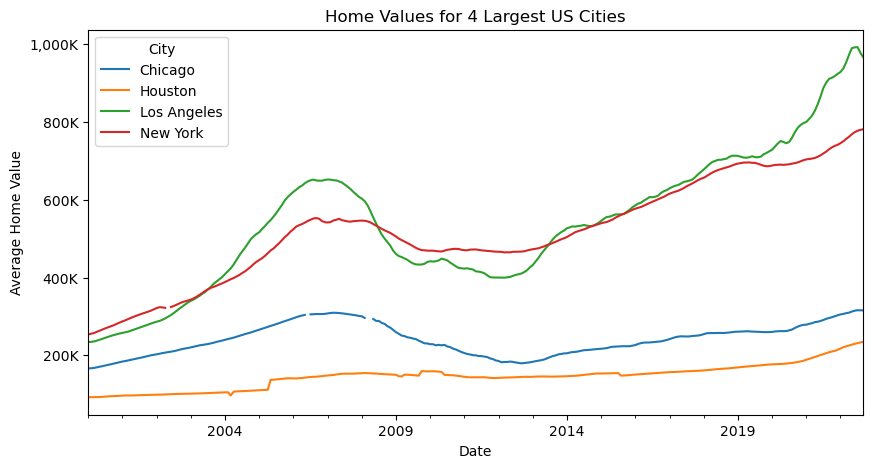

In [21]:
ax = unstacked['Home Value'].plot(figsize=(10,5))
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_title('Home Values for 4 Largest US Cities')
ax.set_ylabel('Average Home Value')

## Which City had the highest Typical Home Value at the end of 2008? Which had the least?


In [26]:
df08 = df_ts.loc[pd.IndexSlice[:, '2008'],:]
df08

RegionID      SizeRank  Home Value
City        Date                                              
Chicago     2008-01-01  17426.000000      3.000000   300207.00
            2008-02-01  17426.000000      3.000000   296063.00
            2008-03-01  17426.000000      3.000000         NaN
            2008-04-01  17426.000000      3.000000         NaN
            2008-05-01  17426.000000      3.000000   293467.00
            2008-06-01  17426.000000      3.000000   288495.00
            2008-07-01  17426.000000      3.000000   288174.00
            2008-08-01  17426.000000      3.000000   283199.00
            2008-09-01  17426.000000      3.000000   280695.00
            2008-10-01  17426.000000      3.000000   274849.00
            2008-11-01  17426.000000      3.000000   271059.00
            2008-12-01  17426.000000      3.000000   265306.00
Houston     2008-01-01  31818.444444  11185.666667   153898.00
            2008-02-01  31818.444444  11185.666667   154279.25
            2008-03-01  31818.444444  11185.666667   153824.75
            2008-04-01  31818.444444  11185.666667   153672.25
            2008-05-01  31818.444444  11185.666667   152941.50
            2008-06-01  31818.444444  11185.666667   153058.75
            2008-07-01  31818.444444  11185.666667   152197.00
            2008-08-01  31818.444444  11185.666667   151908.75
            2008-09-01  31818.444444  11185.666667   151250.00
            2008-10-01  31818.444444  11185.666667   150886.00
            2008-11-01  31818.444444  11185.666667   150650.50
            2008-12-01  31818.444444  11185.666667   150298.50
Los Angeles 2008-01-01  12447.000000      1.000000   603029.00
            2008-02-01  12447.000000      1.000000   596635.00
            2008-03-01  12447.000000      1.000000   586065.00
            2008-04-01  12447.000000      1.000000   571226.00
            2008-05-01  12447.000000      1.000000   554589.00
            2008-06-01  12447.000000      1.000000   539622.00
            2008-07-01  12447.000000      1.000000   524220.00
            2008-08-01  12447.000000      1.000000   510520.00
            2008-09-01  12447.000000      1.000000   500124.00
            2008-10-01  12447.000000      1.000000   490979.00
            2008-11-01  12447.000000      1.000000   481905.00
            2008-12-01  12447.000000      1.000000   469294.00
New York    2008-01-01   6181.000000      0.000000   546538.00
            2008-02-01   6181.000000      0.000000   546098.00
            2008-03-01   6181.000000      0.000000   544562.00
            2008-04-01   6181.000000      0.000000   541865.00
            2008-05-01   6181.000000      0.000000   537685.00
            2008-06-01   6181.000000      0.000000   533810.00
            2008-07-01   6181.000000      0.000000   529211.00
            2008-08-01   6181.000000      0.000000   525290.00
            2008-09-01   6181.000000      0.000000   521347.00
            2008-10-01   6181.000000      0.000000   518048.00
            2008-11-01   6181.000000      0.000000   514767.00
            2008-12-01   6181.000000      0.000000   510309.00

In [27]:
unstacked08 = df08.unstack(level=0)
unstacked08

RegionID                                    SizeRank                \
City        Chicago       Houston Los Angeles New York  Chicago       Houston   
Date                                                                            
2008-01-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-02-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-03-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-04-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-05-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-06-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-07-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-08-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-09-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-10-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-11-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2008-12-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   

                                Home Value                                   
City       Los Angeles New York    Chicago    Houston Los Angeles  New York  
Date                                                                         
2008-01-01         1.0      0.0   300207.0  153898.00    603029.0  546538.0  
2008-02-01         1.0      0.0   296063.0  154279.25    596635.0  546098.0  
2008-03-01         1.0      0.0        NaN  153824.75    586065.0  544562.0  
2008-04-01         1.0      0.0        NaN  153672.25    571226.0  541865.0  
2008-05-01         1.0      0.0   293467.0  152941.50    554589.0  537685.0  
2008-06-01         1.0      0.0   288495.0  153058.75    539622.0  533810.0  
2008-07-01         1.0      0.0   288174.0  152197.00    524220.0  529211.0  
2008-08-01         1.0      0.0   283199.0  151908.75    510520.0  525290.0  
2008-09-01         1.0      0.0   280695.0  151250.00    500124.0  521347.0  
2008-10-01         1.0      0.0   274849.0  150886.00    490979.0  518048.0  
2008-11-01         1.0      0.0   271059.0  150650.50    481905.0  514767.0  
2008-12-01         1.0      0.0   265306.0  150298.50    469294.0  510309.0

Text(0, 0.5, 'Typical Home Value')

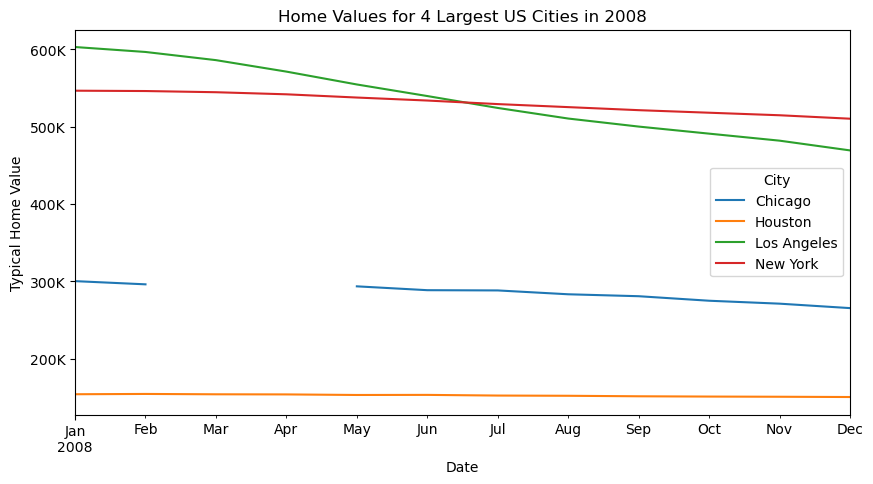

In [28]:
ax = unstacked08['Home Value'].plot(figsize=(10,5))
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_title('Home Values for 4 Largest US Cities in 2008')
ax.set_ylabel('Typical Home Value')

NY had the highest typical home value at the end of 2008, while Houston had the lowest.

## How much did the home values change from November 2008 to December 2008 (in dollars)?

In [30]:
df08_diff = df08.diff()
df08_diff

RegionID      SizeRank  Home Value
City        Date                                              
Chicago     2008-01-01           NaN           NaN         NaN
            2008-02-01      0.000000      0.000000    -4144.00
            2008-03-01      0.000000      0.000000         NaN
            2008-04-01      0.000000      0.000000         NaN
            2008-05-01      0.000000      0.000000         NaN
            2008-06-01      0.000000      0.000000    -4972.00
            2008-07-01      0.000000      0.000000     -321.00
            2008-08-01      0.000000      0.000000    -4975.00
            2008-09-01      0.000000      0.000000    -2504.00
            2008-10-01      0.000000      0.000000    -5846.00
            2008-11-01      0.000000      0.000000    -3790.00
            2008-12-01      0.000000      0.000000    -5753.00
Houston     2008-01-01  14392.444444  11182.666667  -111408.00
            2008-02-01      0.000000      0.000000      381.25
            2008-03-01      0.000000      0.000000     -454.50
            2008-04-01      0.000000      0.000000     -152.50
            2008-05-01      0.000000      0.000000     -730.75
            2008-06-01      0.000000      0.000000      117.25
            2008-07-01      0.000000      0.000000     -861.75
            2008-08-01      0.000000      0.000000     -288.25
            2008-09-01      0.000000      0.000000     -658.75
            2008-10-01      0.000000      0.000000     -364.00
            2008-11-01      0.000000      0.000000     -235.50
            2008-12-01      0.000000      0.000000     -352.00
Los Angeles 2008-01-01 -19371.444444 -11184.666667   452730.50
            2008-02-01      0.000000      0.000000    -6394.00
            2008-03-01      0.000000      0.000000   -10570.00
            2008-04-01      0.000000      0.000000   -14839.00
            2008-05-01      0.000000      0.000000   -16637.00
            2008-06-01      0.000000      0.000000   -14967.00
            2008-07-01      0.000000      0.000000   -15402.00
            2008-08-01      0.000000      0.000000   -13700.00
            2008-09-01      0.000000      0.000000   -10396.00
            2008-10-01      0.000000      0.000000    -9145.00
            2008-11-01      0.000000      0.000000    -9074.00
            2008-12-01      0.000000      0.000000   -12611.00
New York    2008-01-01  -6266.000000     -1.000000    77244.00
            2008-02-01      0.000000      0.000000     -440.00
            2008-03-01      0.000000      0.000000    -1536.00
            2008-04-01      0.000000      0.000000    -2697.00
            2008-05-01      0.000000      0.000000    -4180.00
            2008-06-01      0.000000      0.000000    -3875.00
            2008-07-01      0.000000      0.000000    -4599.00
            2008-08-01      0.000000      0.000000    -3921.00
            2008-09-01      0.000000      0.000000    -3943.00
            2008-10-01      0.000000      0.000000    -3299.00
            2008-11-01      0.000000      0.000000    -3281.00
            2008-12-01      0.000000      0.000000    -4458.00

From the above we can see that from November 2008 to December 2008, home values decreased by:
- $5,753 in Chicago
- \$352 in Houston
- \$12,611 in LA
- \$4,458 in NY